In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn.svm import SVC

In [3]:
from sklearn import datasets

## Hard Margin Classification 

Classification of linearly seperable data with clear boundaries

In [4]:
iris = datasets.load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

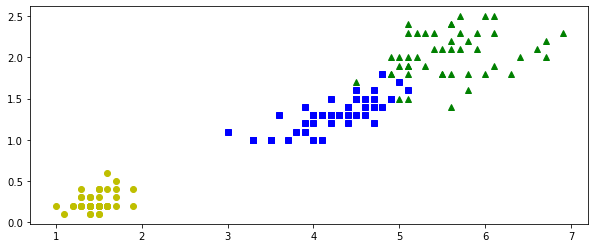

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica (2)")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor (1)")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa (0)")

As can be seen in the plot: 0 and 1 are linearly separable, while 1 and 2 are not. 

I will work with the subset of the dataset that is lineraly separable for this project.

In [8]:
X = X[(y==0)|(y==1)]
y = y[(y==0)|(y==1)]

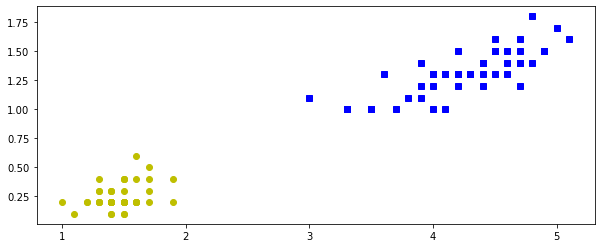

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor (1)")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa (0)")

Train a support vector machine classifier, with as much underfitting as possible C=INF

We will create a space in which we will show the model's working. X0 ~ (0, 5.5) and X1 ~ (0, 2)

In [10]:
x0 = np.linspace(0, 5.5, 200)

In [11]:
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [12]:
help(svm_clf)

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 | 

In [13]:
svm_clf.coef_[0]

array([1.29411744, 0.82352928])

In [14]:
svm_clf.intercept_[0]

-3.7882347112962464

In [15]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [16]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
svs = svm_clf.support_vectors_

In [17]:
svs
# two support vectors

array([[1.9, 0.4],
       [3. , 1.1]])

In [18]:
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

In [19]:
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

(0.0, 5.5, 0.0, 2.0)

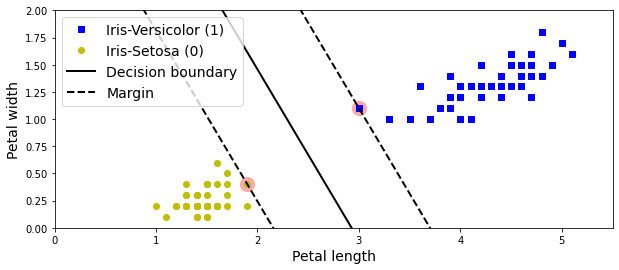

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor (1)") 
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa (0)")

# Highlight the Support Vectors on the graph
plt.scatter(svs[:, 0], svs[:, 1], s=200, facecolors='#FFAAAA')

plt.plot(x0, decision_boundary, "k-", linewidth=2,label='Decision boundary')
plt.plot(x0, gutter_up, "k--", linewidth=2,label='Margin')
plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

In [21]:
svm_clf.predict([[2.5, 0.6],[2.5, 0.7]])

array([0, 1])

## Soft Margin Classification

Classification of linearly separable data without clear boundaries

In [22]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [23]:
X=X[(y==1)|(y==2)]
y=y[(y==1)|(y==2)]

(2.0, 7.0, 0.75, 2.75)

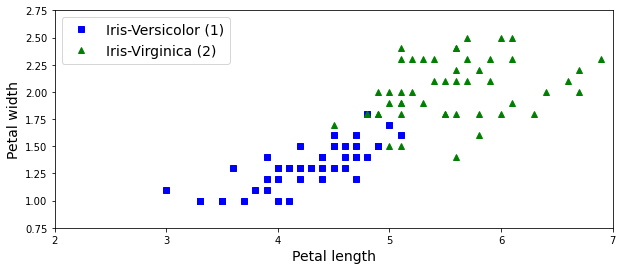

In [24]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor (1)")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica (2)")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([2, 7, 0.75, 2.75])

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [26]:
scaler = StandardScaler()
svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", LinearSVC(C=10, loss="hinge", random_state=42)),
    ])

In [27]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge', random_state=42))])

In [28]:
x0 = np.linspace(2, 7, 500)

In [29]:
svm_clf['linear_svc'].coef_[0]

array([2.73159903, 2.45951903])

In [30]:
svm_clf['linear_svc'].intercept_[0]

0.2983498457875029

LinearSVC does not give support vectors automatically, so we will get them. 

We also have to unscale the model to be able to predict it on the scale of the original data.


In [31]:
# Convert to unscaled parameters
b = svm_clf['linear_svc'].decision_function([-scaler.mean_ / scaler.scale_])
w = svm_clf['linear_svc'].coef_[0] / scaler.scale_
svm_clf['linear_svc'].intercept_ = np.array([b])
svm_clf['linear_svc'].coef_ = np.array([w])

In [32]:
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

In [33]:
margin

0.1718382011313034

In [34]:
# Find support vectors (LinearSVC does not do this automatically)
support_vectors_idx = ( ( ( (X.dot(w) + b) > -1*(1+margin) ) & (y==1) ) |
                       (( (X.dot(w) + b) < (1+margin) ) & (y==2) )
                      ).ravel()

In [35]:
svm_clf['linear_svc'].support_vectors_=X[support_vectors_idx]

In [36]:
svm_clf['linear_svc'].support_vectors_

array([[4.9, 1.5],
       [4.7, 1.6],
       [4.8, 1.8],
       [4.9, 1.5],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.7],
       [5. , 1.5],
       [4.9, 1.8],
       [4.8, 1.8],
       [4.9, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8]])

In [37]:
svs = svm_clf['linear_svc'].support_vectors_

(2.0, 7.0, 0.75, 2.75)

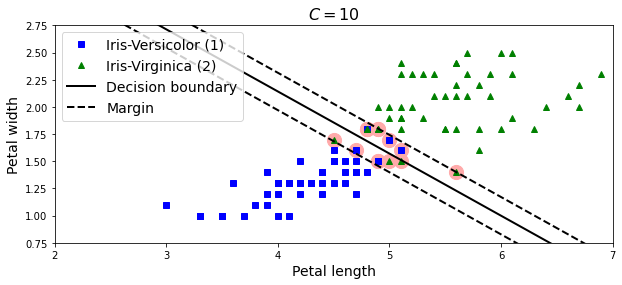

In [38]:
plt.figure(figsize=(10,4))
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor (1)")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica (2)")

# Highlight the Support Vectors on the graph
plt.scatter(svs[:, 0], svs[:, 1], s=200, facecolors='#FFAAAA')

plt.plot(x0, decision_boundary, "k-", linewidth=2,label='Decision boundary')
plt.plot(x0, gutter_up, "k--", linewidth=2,label='Margin')
plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf['linear_svc'].C), fontsize=16)
plt.axis([2, 7, 0.75, 2.75])

Choice of C will decide if we overfit the model to the data or underfit. 

If we choose C=float(inf) we will get a very overfitted model with very few margin errors but it will not generalize well. 